In [ ]:
# General tools 
import pandas as pd
import numpy as np

# Plotting / viz 
import matplotlib.pyplot as plt

# Specialized packages 
from sklearn.decomposition import PCA     # viz n dimensions in 2d
from IPython.display import clear_output  # clearing graph output 

In [ ]:
# Read csv
df = pd.read_csv('unga9125_cleaned.csv')

In [ ]:
# View columns
df.columns

Index(['Unnamed: 0', 'country_code', 'name', 'agreements_w_usa',
       'pct_agreement_w_usa', 'agreements_w_china', 'pct_agreement_w_china',
       'agreements_w_russia', 'pct_agreement_w_russia'],
      dtype='object')

In [ ]:
# Drop 'Unnamed: 0' column 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Defining features for k-means
features = ['pct_agreement_w_usa',
            'pct_agreement_w_china',
            'pct_agreement_w_russia']

In [ ]:
# Drop NaN values 
df = df.dropna(subset=features)

In [ ]:
# Data df only containing features for k-means
data = df[features].copy()

In [ ]:
# Data is on a percentage scale, scaling would be unnecessary 
# Creating random centriod positions 
def random_centroids(data, k): 
    centroids = []
    for i in range(k): 
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [ ]:
# Assigning random_centroids function to a variable 
centroids = random_centroids(data, 3)

/var/folders/vy/kdp_qm9n34jdpdmqk1dtnc100000gn/T/ipykernel_59936/1903037773.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [ ]:
# View random centroids
centroids

,0,1,2
pct_agreement_w_usa,31.97,37.09,38.56
pct_agreement_w_china,67.93,77.54,79.90
pct_agreement_w_russia,74.52,76.86,56.54


In [14]:
# Finding distance between each datapoint and the centroids 
def get_labels (data, centroids): 
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
# Assign get_labels function to variable 
labels = get_labels(data, centroids)

In [ ]:
# View value counts for centroid clusters
labels.value_counts()

1    129
2     60
0      7
Name: count, dtype: int64

In [ ]:
# Updating centroids based on cluster position 
# Calc geom mean to get new cluster centers 
def new_centroids (data, labels, k): 
    return data.groupby(labels).apply(
        lambda x: np.exp(np.log(x).mean())
    ).T

In [ ]:
# Plotting cluster assignments at each iteration of centroid repositioning 
def plt_clusters (data, labels, centroids, iteration): 
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration: {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()



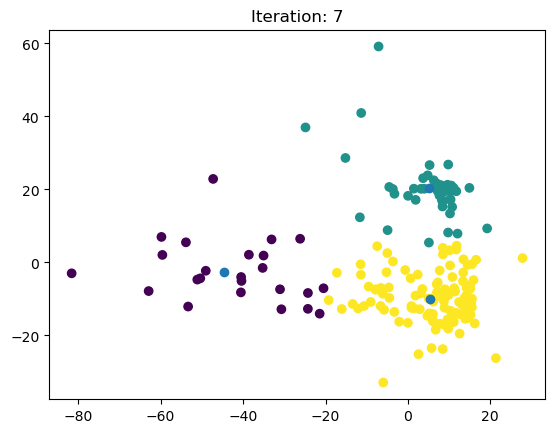

In [ ]:
# Iteration loop 
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids): 
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plt_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
# View centroids 
centroids 

,0,1,2
pct_agreement_w_usa,28.914467,68.629364,43.636933
pct_agreement_w_china,41.897791,61.474016,78.916186
pct_agreement_w_russia,37.722011,70.071780,68.801654


In [ ]:
# View cluster 0
df[labels==0][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
28,CENTRAL AFRICAN REPUBLIC,25.61,46.93,41.19
35,DEMOCRATIC REPUBLIC OF THE CONGO,24.71,38.88,33.39
38,COMOROS,28.88,60.49,50.72
47,DOMINICA,28.05,44.95,41.85
66,GAMBIA,32.69,58.37,50.44
68,EQUATORIAL GUINEA,24.97,38.70,34.54
81,IRAQ,29.10,63.30,52.19
92,KIRIBATI,32.33,28.91,25.00
93,SAINT KITTS AND NEVIS,34.66,48.54,41.97
98,LIBERIA,36.95,45.33,38.53


In [ ]:
# View cluster 1
df[labels==1][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
2,ALBANIA,65.27,55.54,63.23
3,ANDORRA,69.27,62.17,71.16
5,ARGENTINA,64.95,76.36,79.43
8,AUSTRALIA,68.14,60.86,65.31
9,AUSTRIA,70.20,64.13,73.91
12,BELGIUM,69.85,63.34,72.75
16,BULGARIA,68.49,62.86,72.12
19,BOSNIA AND HERZEGOVINA,55.61,55.79,58.03
29,CANADA,72.13,60.38,68.50
30,SWITZERLAND,67.18,66.02,71.56


In [ ]:
# View cluster 2
df[labels==2][['name']+ features]

,name,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia
0,AFGHANISTAN,37.35,70.28,59.18
1,ANGOLA,36.76,74.53,64.21
4,UNITED ARAB EMIRATES,44.55,87.82,72.22
6,ARMENIA,54.63,71.42,76.86
7,ANTIGUA AND BARBUDA,45.43,76.40,67.34
...,...,...,...,...
188,VIET NAM,38.64,86.04,71.73
191,YEMEN,41.07,85.13,70.81
193,SOUTH AFRICA,44.99,79.68,73.01
194,ZAMBIA,43.81,80.30,68.56


In [ ]:
# New DataFrames of name, code and feature 
cl0 = df[labels==0][['name','country_code']+ features]
cl1 = df[labels==1][['name','country_code']+ features]
cl2 = df[labels==2][['name','country_code']+ features]

In [ ]:
# Add cluster column to each new DataFrame 
cl0['cluster'] = 0
cl1['cluster'] = 1
cl2['cluster'] = 2

In [ ]:
# Add period column to each new DataFrame
cl0['period'] = '1991-2025'
cl1['period'] = '1991-2025'
cl2['period'] = '1991-2025'

In [ ]:
# Check formatting
cl0


,name,country_code,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia,cluster,period
28,CENTRAL AFRICAN REPUBLIC,CAF,25.61,46.93,41.19,0,1991-2025
35,DEMOCRATIC REPUBLIC OF THE CONGO,COD,24.71,38.88,33.39,0,1991-2025
38,COMOROS,COM,28.88,60.49,50.72,0,1991-2025
47,DOMINICA,DMA,28.05,44.95,41.85,0,1991-2025
66,GAMBIA,GMB,32.69,58.37,50.44,0,1991-2025
68,EQUATORIAL GUINEA,GNQ,24.97,38.70,34.54,0,1991-2025
81,IRAQ,IRQ,29.10,63.30,52.19,0,1991-2025
92,KIRIBATI,KIR,32.33,28.91,25.00,0,1991-2025
93,SAINT KITTS AND NEVIS,KNA,34.66,48.54,41.97,0,1991-2025
98,LIBERIA,LBR,36.95,45.33,38.53,0,1991-2025


In [ ]:
# Concatenate all data into 1 DataFrame
df_clustered = pd.concat([cl0, cl1, cl2])

In [ ]:
# View concatenated data
df_clustered

,name,country_code,pct_agreement_w_usa,pct_agreement_w_china,pct_agreement_w_russia,cluster,period
28,CENTRAL AFRICAN REPUBLIC,CAF,25.61,46.93,41.19,0,1991-2025
35,DEMOCRATIC REPUBLIC OF THE CONGO,COD,24.71,38.88,33.39,0,1991-2025
38,COMOROS,COM,28.88,60.49,50.72,0,1991-2025
47,DOMINICA,DMA,28.05,44.95,41.85,0,1991-2025
66,GAMBIA,GMB,32.69,58.37,50.44,0,1991-2025
...,...,...,...,...,...,...,...
188,VIET NAM,VNM,38.64,86.04,71.73,2,1991-2025
191,YEMEN,YEM,41.07,85.13,70.81,2,1991-2025
193,SOUTH AFRICA,ZAF,44.99,79.68,73.01,2,1991-2025
194,ZAMBIA,ZMB,43.81,80.30,68.56,2,1991-2025


In [ ]:
# Save data to csv
df_clustered.to_csv('clustered_unga9126_4.csv')